# Calculate Performance Metrics for MCMC algorithm

   ### 1. Precision = $\frac{|\ true-data\ ∩\ predicted-data\ |}{|\ true-data\ |}$
   ### 2. Recall = $\frac{|\ true-data\ ∩\ predicted-data\ |}{|\ predicted-data\ |}$
   ### 3. F_beta = $\frac{(1+\beta^2)\  . \ (precision\ *\ recall)}{(\beta^2.precision\ +\ recall)}$
   #### where,
   * ####           True Data= Action Profile produced by true/trace expression
   * ####           True Data= Action Profile produced by learned expression

In [1]:
from environment import *
from rules_3 import *
from robot_task_new import *
from algorithm_1 import create_data,algorithm_1,to_tuple
from mcmc_performance import performance

import seaborn as sns
from collections import Counter
import os
import sys
from copy import deepcopy
from numpy import nan
import matplotlib.pyplot as plt
import time

### Initialise the environment

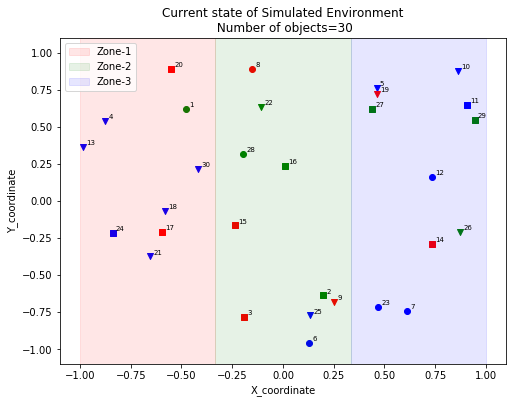

In [10]:
env=create_env(N=30)
fig,ax=plt.subplots(figsize=(8,6))
plot_env(env,ax,legend=True)

### Intialise the True Expression (or Norms) and the task

In [9]:
true_expression=expand("NORMS")
print_expression(true_expression)

------------------------------------------------
                NORM Number=1
------------------------------------------------
   > PROHIBITED to PUTDOWN
     B-TRIANGLEs in ZONE-2
------------------------------------------------
                NORM Number=2
------------------------------------------------
   > PERMITTED to PUTDOWN
     G-CIRCLEs in ZONE-1


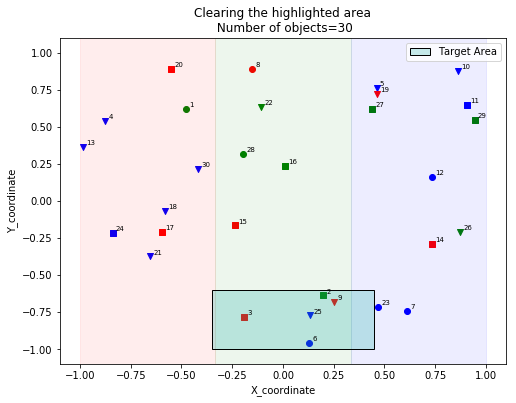

In [11]:
target_area=[position(-0.35,-1),position(0.45,-0.6)]
task1=task(colour_specific='b',shape_specific="triangle",target_area=target_area)
fig,ax=plt.subplots(figsize=(8,6))
plot_task(env,ax,"Clearing the highlighted area",task1,True)

### Run MCMC to generate the sequence of expressions

In [12]:
s=time.time()
action_profile_with_norms=create_data(task1,true_expression,env,"pr_test",num_repeat=500,verbose=False)
print ("Time Taken to complete job={:.2f}s\n".format(time.time()-s))

data_with_norms=[]
for itr,ap in action_profile_with_norms.items():
    for i in range(0,int(len(ap)/2)):
        data_with_norms.append(tuple([ap[2*i],ap[2*i+1]]))
print ("Data Generated:")
for i in range(5):
    print(data_with_norms[i])

Generating for case pr_test
Time Taken to complete job=226.63s

Data Generated:
(('pickup', 25), ('putdown', 25, 1))
(('pickup', 25), ('putdown', 25, 3))
(('pickup', 25), ('putdown', 25, 1))
(('pickup', 25), ('putdown', 25, 1))
(('pickup', 25), ('putdown', 25, 1))


In [13]:
s=time.time()
print ("Generating sequence")
exp_seq_with,lik_list_with=algorithm_1(data_with_norms,env,q_dict,rule_dict,filename="precision_recall/mcmc_report",max_iterations=50000,testing=True)
print ("\nTime Taken to complete job={:.2f}s\n".format(time.time()-s))

Generating sequence
E0 chosen is:
------------------------------------------------
                NORM Number=1
------------------------------------------------
   > OBLIGATORY to
     PUTDOWN R-SQUAREs in ZONE-2
     if you PICKUP R-SQUAREs
------------------------------------------------
                NORM Number=2
------------------------------------------------
   > PERMITTED to PICKUP
     R-SQUAREs in ZONE-1

Time Taken to complete job=204.31s



### Calculate performance metrics with warmup of sequence

In [14]:
learned_expressions=Counter(map(to_tuple,exp_seq_with[int(len(exp_seq_with)/2)+1:]))
print ("Number of unique Norms in sequence={}".format(len(learned_expressions)))
result=performance(task1,env,true_expression,learned_expressions,name="exp_warmup",top_n=np.nan,beta=1,verbose=False)
result

Number of unique Norms in sequence=53


,norm_rank,weight,precision,recall,F_1
0,1,0.02360,1.0,1.0,1.0
1,2,0.02244,1.0,1.0,1.0
2,3,0.02240,1.0,1.0,1.0
3,4,0.02228,1.0,1.0,1.0
4,5,0.02200,1.0,1.0,1.0
5,6,0.02152,1.0,1.0,1.0
6,7,0.02108,1.0,1.0,1.0
7,8,0.02092,1.0,1.0,1.0
8,9,0.02068,1.0,1.0,1.0
9,10,0.02056,1.0,1.0,1.0


In [15]:
top=learned_expressions.most_common()
t_with=sum(learned_expressions.values())
exists = os.path.isfile('./precision_recall/top_norms_with_warmup.txt')
if exists==True:
    os.remove('./precision_recall/top_norms_with_warmup.txt')
original = sys.stdout
for i in range(len(top)):
    exp=top[i]
    if (i%10==0):
        print("Rank:{} Norm has relative frequency={:.3f}%".format(i+1,exp[1]*100/t_with))
    sys.stdout = open('./precision_recall/top_norms_with_warmup.txt', 'a+')
    print("\n\n\n************Rank:{}, %-Frequency={:.3f}%**********".format(i+1,exp[1]*100/t_with))
    print_expression(exp[0])
    print("*************************************************")
    sys.stdout=original

Rank:1 Norm has relative frequency=2.360%
Rank:11 Norm has relative frequency=2.056%
Rank:21 Norm has relative frequency=1.944%
Rank:31 Norm has relative frequency=1.860%
Rank:41 Norm has relative frequency=1.752%
Rank:51 Norm has relative frequency=1.512%


In [17]:
result.to_csv("performance_metrics.csv",index=False)

### Calculate performance metrics with out warmup of sequence

In [19]:
learned_expressions=Counter(map(to_tuple,exp_seq_with))
print ("Number of unique Norms in sequence={}".format(len(learned_expressions)))
result=performance(task1,env,true_expression,learned_expressions,top_n=np.nan,beta=1,verbose=False)
result

Number of unique Norms in sequence=258
    norm_rank   weight  precision  recall       F_1
0           1  0.02132   1.000000     1.0  1.000000
1           2  0.02080   1.000000     1.0  1.000000
2           3  0.02038   1.000000     1.0  1.000000
3           4  0.01996   1.000000     1.0  1.000000
4           5  0.01994   1.000000     1.0  1.000000
5           6  0.01990   1.000000     1.0  1.000000
6           7  0.01980   1.000000     1.0  1.000000
7           8  0.01974   1.000000     1.0  1.000000
8           9  0.01972   1.000000     1.0  1.000000
9          10  0.01962   1.000000     1.0  1.000000
10         11  0.01958   1.000000     1.0  1.000000
11         12  0.01956   1.000000     1.0  1.000000
12         13  0.01952   1.000000     1.0  1.000000
13         14  0.01946   1.000000     1.0  1.000000
14         15  0.01944   1.000000     1.0  1.000000
15         16  0.01934   1.000000     1.0  1.000000
16         17  0.01934   1.000000     1.0  1.000000
17         18  0.01914   

,norm_rank,weight,precision,recall,F_1
0,1,0.02132,1.000000,1.0,1.000000
1,2,0.02080,1.000000,1.0,1.000000
2,3,0.02038,1.000000,1.0,1.000000
3,4,0.01996,1.000000,1.0,1.000000
4,5,0.01994,1.000000,1.0,1.000000
5,6,0.01990,1.000000,1.0,1.000000
6,7,0.01980,1.000000,1.0,1.000000
7,8,0.01974,1.000000,1.0,1.000000
8,9,0.01972,1.000000,1.0,1.000000
9,10,0.01962,1.000000,1.0,1.000000
